#### KM curves for external validation of CPTAC-LUAD

Text(36.0, 1, 'p=0.02')

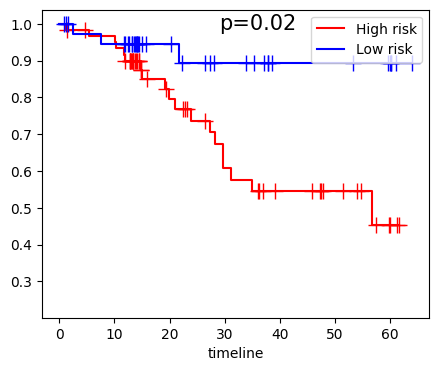

In [4]:
import pickle as pkl

file_pth = '../demo/TCGA-LUAD/prog_lung.pkl'
with open(file_pth, 'rb') as file:
    val_res = pkl.load(file)

all_names, all_risk_scores, all_censorships, all_event_times = val_res

import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt
import numpy as np

kmf = KaplanMeierFitter()
plt.figure(figsize=(5, 4))

cutoff = -2.26
ix = all_risk_scores > cutoff
kmf.fit(all_event_times[ix], 1-all_censorships[ix], label='High risk')
kmf.plot(color='red', show_censors=True, ci_alpha=0)

ix = all_risk_scores <= cutoff
kmf.fit(all_event_times[ix], 1-all_censorships[ix], label='Low risk')
kmf.plot(color='blue', show_censors=True, ci_alpha=0)

results = logrank_test(
    all_event_times[all_risk_scores > cutoff],
    all_event_times[all_risk_scores <= cutoff],
    event_observed_A=1-all_censorships[all_risk_scores > cutoff],
    event_observed_B=1-all_censorships[all_risk_scores <= cutoff]
)

plt.text((np.max(all_event_times) + 10) // 2, 1, f'p={results.p_value:.1g}', horizontalalignment='center', verticalalignment='center', fontsize=15)